# Empathic Art- SVM modeling
by Mickey Krekels 

## Loading imports

In [1]:
# import pandas
import pandas as pd
from pydub import AudioSegment

# import numpy
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt

# import plotly
import plotly.express as px

# import os 
from os import listdir
from os.path import isfile, join

# import librosa
import cv2
import librosa
import librosa.display

# import tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


from torch.utils.data import DataLoader, TensorDataset
from tensorflow.keras.models import load_model
from sklearn.svm import SVC




# import PIL 
# this is needed for loading large images dataset 
import PIL 
import pathlib
import shutil

# import datetime
from datetime import datetime


#import os
import os
import pickle


c:\Users\micke\AppData\Local\Programs\Python\Python39\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)
c:\Users\micke\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Loading data
This dataset is a combination of Dataset:

- [Toronto emotional speech set (TESS) - Older talker_Happy](https://tspace.library.utoronto.ca/handle/1807/24501)<br>
Author:<br>
Dupuis, Kate; Pichora-Fuller, M. Kathleen
- [The Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS)](https://zenodo.org/record/1188976#.Y0e8o3ZBy3C)<br>
Author:<br>
Livingstone, Steven R., & Russo, Frank A.
- [The variably intense vocalizations of affect and emotion (VIVAE)](https://pubmed.ncbi.nlm.nih.gov/35129996/)<br>
Author:<br>
Natalie Holz, Pauline Larrouy-Maestri, David Poeppel.

In [2]:
audio_data = {
    "Vivae": "../../data/VIVAE/core_set/", 
    "Ravdess": "../../data/RAVDESS/Audio_Speech_Actors/", 
    "Tess": "../../data/utoronto/data",
}

Loading the dataframe

In [3]:
merged_data = "../../data/merged_data.csv"
df = open(merged_data, "r")
df = pd.read_csv(df)
df.head(10)

,file_name,Speaker,Emotion,Intensity,Dataframe,Duration,Word,Type,Gender
0,S04_fear_peak_03.wav,S04,Fear,peak,VIVAE,0.752472,NaN,Sound,NaN
1,S09_pleasure_strong_08.wav,S09,Pleasure,strong,VIVAE,0.752472,NaN,Sound,NaN
2,S07_pleasure_peak_07.wav,S07,Pleasure,peak,VIVAE,0.672404,NaN,Sound,NaN
3,S04_pain_strong_08.wav,S04,Pain,strong,VIVAE,0.752472,NaN,Sound,NaN
4,S04_fear_strong_05.wav,S04,Fear,strong,VIVAE,0.672404,NaN,Sound,NaN
5,S08_pain_peak_01.wav,S08,Pain,peak,VIVAE,0.536463,NaN,Sound,NaN
6,S06_fear_moderate_03.wav,S06,Fear,moderate,VIVAE,0.752472,NaN,Sound,NaN
7,S09_pain_moderate_09.wav,S09,Pain,moderate,VIVAE,0.672404,NaN,Sound,NaN
8,S01_pain_moderate_04.wav,S01,Pain,moderate,VIVAE,0.536463,NaN,Sound,NaN
9,S07_surprise_strong_01.wav,S07,Surprise,strong,VIVAE,0.989025,NaN,Sound,NaN


For this modeling phase were only interested in the columns filename and Emotion.

## Converting the audio files to Mel-spectograms and saving the result locally

In [4]:
vivae_df = df.loc[df["Dataframe"] == "VIVAE"]
vivae_df

,file_name,Speaker,Emotion,Intensity,Dataframe,Duration,Word,Type,Gender
0,S04_fear_peak_03.wav,S04,Fear,peak,VIVAE,0.752472,NaN,Sound,NaN
1,S09_pleasure_strong_08.wav,S09,Pleasure,strong,VIVAE,0.752472,NaN,Sound,NaN
2,S07_pleasure_peak_07.wav,S07,Pleasure,peak,VIVAE,0.672404,NaN,Sound,NaN
3,S04_pain_strong_08.wav,S04,Pain,strong,VIVAE,0.752472,NaN,Sound,NaN
4,S04_fear_strong_05.wav,S04,Fear,strong,VIVAE,0.672404,NaN,Sound,NaN
...,...,...,...,...,...,...,...,...,...
475,S05_pleasure_moderate_10.wav,S05,Pleasure,moderate,VIVAE,0.505011,NaN,Sound,NaN
476,S08_surprise_moderate_07.wav,S08,Surprise,moderate,VIVAE,1.158889,NaN,Sound,NaN
477,S05_surprise_low_02.wav,S05,Surprise,low,VIVAE,1.880295,NaN,Sound,NaN
478,S09_pleasure_peak_102.wav,S09,Pleasure,peak,VIVAE,0.837800,NaN,Sound,NaN


In [5]:
saving_path = "C:/Users/micke/Desktop/Fontys/S7/Group_project/dataset_merged_local_save/"

audio_file_path_list = []

vivae_df = df[df["Dataframe"] == "VIVAE"]
tess_df = df[df["Dataframe"] == "TESS"]
# ravedess_df = df[df["Dataframe"] == "RAVEDESS"]


for index, row in vivae_df.iterrows():
    audio_file_path_list.append(audio_data["Vivae"] + "/" + row["file_name"])

for index, row in tess_df.iterrows():
    audio_file_path_list.append(audio_data["Tess"] + "/" + row["file_name"])

# for index, row in ravedess_df.iterrows():

#     path = audio_data["Ravdess"]+ "Actor_" + "/" + row["file_name"]
#     audio_file_path_list.append(audio_data["Ravdess"] + "/" + row["file_name"])

# for filename in os.listdir(audio_data["Ravdess"]):
#     f = os.path.join(audio_data["Ravdess"], filename)
#     # checking if it is a file



len(audio_file_path_list)

3280

In [6]:
frames = [vivae_df, tess_df]
df = pd.concat(frames)
df["sound_path"] = audio_file_path_list
df

,file_name,Speaker,Emotion,Intensity,Dataframe,Duration,Word,Type,Gender,sound_path
0,S04_fear_peak_03.wav,S04,Fear,peak,VIVAE,0.752472,NaN,Sound,NaN,../../data/VIVAE/core_set//S04_fear_peak_03.wav
1,S09_pleasure_strong_08.wav,S09,Pleasure,strong,VIVAE,0.752472,NaN,Sound,NaN,../../data/VIVAE/core_set//S09_pleasure_strong...
2,S07_pleasure_peak_07.wav,S07,Pleasure,peak,VIVAE,0.672404,NaN,Sound,NaN,../../data/VIVAE/core_set//S07_pleasure_peak_0...
3,S04_pain_strong_08.wav,S04,Pain,strong,VIVAE,0.752472,NaN,Sound,NaN,../../data/VIVAE/core_set//S04_pain_strong_08.wav
4,S04_fear_strong_05.wav,S04,Fear,strong,VIVAE,0.672404,NaN,Sound,NaN,../../data/VIVAE/core_set//S04_fear_strong_05.wav
...,...,...,...,...,...,...,...,...,...,...
3275,YAF_tough_happy.wav,YAF,Happy,Moderate,TESS,1.866019,tough,Non-Sound,NaN,../../data/utoronto/data/YAF_tough_happy.wav
3276,OAF_nice_angry.wav,OAF,angry,Moderate,TESS,2.275907,nice,Non-Sound,NaN,../../data/utoronto/data/OAF_nice_angry.wav
3277,YAF_gap_ps.wav,YAF,ps,Moderate,TESS,1.652535,gap,Non-Sound,NaN,../../data/utoronto/data/YAF_gap_ps.wav
3278,OAF_phone_fear.wav,OAF,Fear,Moderate,TESS,2.189645,phone,Non-Sound,NaN,../../data/utoronto/data/OAF_phone_fear.wav


Converting the sound files to mel-spectrograms 

In [8]:
for index, row in df.iterrows():
    # load audio file
    path = row["sound_path"]
    x, sr = librosa.load(path, sr=44100)
    print(x[0][0])
    # compute mel-spectrogram
    melspectrum = librosa.feature.melspectrogram(y=x, sr=sr, hop_length= 512, window='hann', n_mels=256)
    # convert to decibels
    S_dB = librosa.power_to_db(melspectrum, ref=np.max)
    # convert plot to image
    img = librosa.display.specshow(S_dB)
    # save image to disk
    img.figure.savefig(saving_path + "/"+ row['file_name'] +'.png')
    plt.close()
    break

(33184,)


In [8]:
image_path_list = []
for index, row in df.iterrows():
    image_path_list.append(saving_path + "/"+ row['file_name'] +'.png')

df["image_path"] = image_path_list

## Saving to Tensorflow format

In [9]:
class_names = df["Emotion"].unique()
print(class_names)

['Fear' 'Pleasure' 'Pain' 'Surprise' 'Angry' 'Achievement' 'Calm' 'Sad'
 'Happy' 'ps' 'Disgust' 'angry']


In [10]:
#remane Emotion value ps to suprise
df["Emotion"] = df["Emotion"].replace("ps", "Surprise")
df["Emotion"] = df["Emotion"].replace("angry", "Angry")
class_names = df["Emotion"].unique()
print(class_names)

['Fear' 'Pleasure' 'Pain' 'Surprise' 'Angry' 'Achievement' 'Calm' 'Sad'
 'Happy' 'Disgust']


In [11]:
unique_count = df['Emotion'].value_counts()
unique_count

Fear           480
Surprise       480
Angry          480
Calm           400
Sad            400
Happy          400
Disgust        400
Pleasure        80
Pain            80
Achievement     80
Name: Emotion, dtype: int64

The values **Pleasure, Pain and Achievement** are not going to be used for this model. There are only 80 labels aviable and that is not enough for training a network.

In [12]:
df = df.loc[df["Emotion"] != 'Pleasure' ]
df = df.loc[df["Emotion"] != 'Pain' ]
df = df.loc[df["Emotion"] != 'Achievement' ]

unique_count = df['Emotion'].value_counts()
unique_count

Fear        480
Surprise    480
Angry       480
Calm        400
Sad         400
Happy       400
Disgust     400
Name: Emotion, dtype: int64

In [13]:
class_names = df["Emotion"].unique()
class_names

array(['Fear', 'Surprise', 'Angry', 'Calm', 'Sad', 'Happy', 'Disgust'],
      dtype=object)

In total we have 7 label types

In [14]:
len(unique_count)

7

Where using this helper function below to save the spectogram into there correct folders
            

In [15]:
def df_to_tensorflow_dataset(copy_dir,df,labels):
    dfs = []

    for label in labels:
        dfs.append(df[df['Emotion'] == label])

    for df_split in dfs:

        for index, row in df_split.iterrows():
            label = row['Emotion']
            path = row['image_path']
            shutil.copy(path, copy_dir + label + "/")

In [3]:
tensorflow_data_path = "C:/Users/micke/Desktop/Fontys/S7/Group_project/"


# Using CNN model for the categorization
We suffle the dataset

In [69]:
df = df.sample(frac=1).reset_index(drop=True)
df

,file_name,Speaker,Emotion,Intensity,Dataframe,Duration,Word,Type,Gender,sound_path,image_path
0,OAF_juice_ps.wav,OAF,Surprise,Moderate,TESS,1.934423,juice,Non-Sound,NaN,../../data/utoronto/data/OAF_juice_ps.wav,C:/Users/micke/Desktop/Fontys/S7/Group_project...
1,OAF_bite_neutral.wav,OAF,Calm,Moderate,TESS,1.807119,bite,Non-Sound,NaN,../../data/utoronto/data/OAF_bite_neutral.wav,C:/Users/micke/Desktop/Fontys/S7/Group_project...
2,YAF_mood_angry.wav,YAF,Angry,Moderate,TESS,2.228516,mood,Non-Sound,NaN,../../data/utoronto/data/YAF_mood_angry.wav,C:/Users/micke/Desktop/Fontys/S7/Group_project...
3,OAF_tough_disgust.wav,OAF,Disgust,Moderate,TESS,1.754403,tough,Non-Sound,NaN,../../data/utoronto/data/OAF_tough_disgust.wav,C:/Users/micke/Desktop/Fontys/S7/Group_project...
4,OAF_dab_neutral.wav,OAF,Calm,Moderate,TESS,1.889244,dab,Non-Sound,NaN,../../data/utoronto/data/OAF_dab_neutral.wav,C:/Users/micke/Desktop/Fontys/S7/Group_project...
...,...,...,...,...,...,...,...,...,...,...,...
3035,OAF_name_angry.wav,OAF,Angry,Moderate,TESS,1.878389,name,Non-Sound,NaN,../../data/utoronto/data/OAF_name_angry.wav,C:/Users/micke/Desktop/Fontys/S7/Group_project...
3036,OAF_home_angry.wav,OAF,Angry,Moderate,TESS,1.839150,home,Non-Sound,NaN,../../data/utoronto/data/OAF_home_angry.wav,C:/Users/micke/Desktop/Fontys/S7/Group_project...
3037,OAF_pick_happy.wav,OAF,Happy,Moderate,TESS,2.144712,pick,Non-Sound,NaN,../../data/utoronto/data/OAF_pick_happy.wav,C:/Users/micke/Desktop/Fontys/S7/Group_project...
3038,OAF_gun_ps.wav,OAF,Surprise,Moderate,TESS,2.439256,gun,Non-Sound,NaN,../../data/utoronto/data/OAF_gun_ps.wav,C:/Users/micke/Desktop/Fontys/S7/Group_project...


creating a test and train set RNN model (split of 80:20)

In [70]:
train = df[:int(len(df)*0.8)]
test  = df[int(len(df)*0.8):]

In [71]:
labels = df["Emotion"].unique()

# df_to_tensorflow_dataset(tensorflow_data_path +'input/training/',train,labels)
# df_to_tensorflow_dataset(tensorflow_data_path +'input/validation/',test,labels)

In [72]:
data_dir = pathlib.Path(tensorflow_data_path + 'input/training/')

image_size = cv2.imread(df.image_path[0]).shape

batch_size = 32
img_height = image_size[0]
img_width = image_size[1]

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2432 files belonging to 7 classes.
Using 1946 files for training.


In [73]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2432 files belonging to 7 classes.
Using 486 files for validation.


In [74]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [75]:
class_len = len(class_names)

cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[img_height, img_width, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
# cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
## For Binary Classification
cnn.add(tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='linear')) #
## for mulitclassification
cnn.add(tf.keras.layers.Dense(class_len, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='softmax'))
cnn.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])

In [76]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 144, 216, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 72, 108, 32)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 108, 32)       9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 54, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 62208)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               7962752   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [ ]:
# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = train_ds, validation_data = val_ds, epochs = 15)

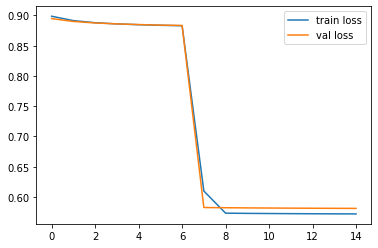

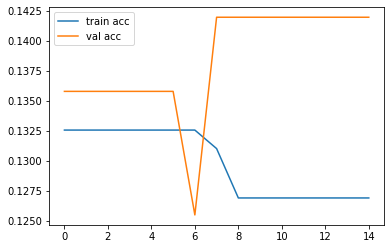

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
cnn.save(tensorflow_data_path +'models/model_CNN_v3.h5')

The CNN + SVM model does not preform well under training. Therefore in the next chapter where going to look at regual SVM 

## Using Normal SVM
Loading the images and labels into memory 

In [17]:
training_data = []

for index, row in df.iterrows():
    label = row['Emotion']
    path = row['image_path']
    img_array=cv2.imread(path)
    img_array = img_array/255 #normalize    
    training_data.append([img_array,label])

In [18]:
X=[]
y=[]
lenofimage = len(training_data)


for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X)
y=np.array(y)

Creating a training and test set

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

Training the network

In [ ]:
svc = SVC(kernel='linear',gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [20]:
tensorflow_data_path = "C:/Users/micke/Desktop/Fontys/S7/Group_project/model"
filename = tensorflow_data_path + '/model/'+ 'finalized_model.sav'

svc = pickle.load(open(filename, 'rb'))

Saving the model as a pickle object

In [ ]:
filename = tensorflow_data_path + 'model/finalized_model_1.sav'


pickle.dump(svc, open(filename, 'wb'))

Validating the model score with a prediction

In [ ]:
y2 = svc.predict(X_test)

In [ ]:
print("Accuracy on unknown data is",accuracy_score(y_test,y2))

Accuracy on unknown data is 0.9552631578947368


The model has a accuracy score of 0.9552631578947368 on the validating data

In [ ]:
print("Accuracy on unknown data is",classification_report(y_test,y2))

Accuracy on unknown data is               precision    recall  f1-score   support

       Angry       0.91      0.91      0.91       128
        Calm       1.00      1.00      1.00       104
     Disgust       1.00      1.00      1.00        90
        Fear       0.89      0.93      0.91       120
       Happy       1.00      1.00      1.00        94
         Sad       1.00      1.00      1.00       102
    Surprise       0.93      0.89      0.91       122

    accuracy                           0.96       760
   macro avg       0.96      0.96      0.96       760
weighted avg       0.96      0.96      0.96       760



Final look at all of the predictions 

In [ ]:
result = pd.DataFrame({'original' : y_test,'predicted' : y2})
result


,original,predicted
0,Disgust,Disgust
1,Calm,Calm
2,Angry,Angry
3,Disgust,Disgust
4,Happy,Happy
...,...,...
755,Calm,Calm
756,Surprise,Surprise
757,Disgust,Disgust
758,Fear,Fear


This result much better than the previuos model 

## Testing with split audio files

In this short section, were going to look if shorting the audio time has an impact on the model's accuracy

In [ ]:
tensorflow_data_path = "C:/Users/micke/Desktop/Fontys/S7/Group_project/model"
filename = tensorflow_data_path + '/model/'+ 'finalized_model.sav'

loaded_model = pickle.load(open(filename, 'rb'))


In [ ]:
def save_audiofile_into_sample(path,save_path,audio_name,t2 = 1):
    newAudio = AudioSegment.from_wav(path)
    newAudio = newAudio[:t2]
    name = save_path + audio_name + '_'+ str(t2)+'.wav'
    newAudio.export(name, format="wav")
    return name

In [ ]:
saving_path = "C:/Users/micke/Desktop/Fontys/S7/Group_project/dataset_merged_splitsize_local_save/"
df = df.reset_index(drop=True)
test_df = df[:200]


test_df["sound_path_1000"] = ""
test_df["sound_path_500"]  = ""
test_df["sound_path_200"]  = ""


for index, row in test_df.iterrows():
    path = row["sound_path"]
    name = row['file_name']
    test_df["sound_path_1000"][index] = save_audiofile_into_sample(path,saving_path,name,1000)
    test_df["sound_path_500"][index] =  save_audiofile_into_sample(path,saving_path,name,500)    
    test_df["sound_path_200"][index] =  save_audiofile_into_sample(path,saving_path,name,200)



C:\Users\micke\AppData\Local\Temp/ipykernel_6060/281640622.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["sound_path_1000"] = ""
C:\Users\micke\AppData\Local\Temp/ipykernel_6060/281640622.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["sound_path_500"]  = ""
C:\Users\micke\AppData\Local\Temp/ipykernel_6060/281640622.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [ ]:
test_df

,file_name,Speaker,Emotion,Intensity,Dataframe,Duration,Word,Type,Gender,sound_path,image_path,sound_path_1000,sound_path_500,sound_path_200
0,OAF_door_fear.wav,OAF,Fear,Moderate,TESS,2.714017,door,Non-Sound,NaN,../../data/utoronto/data/OAF_door_fear.wav,C:/Users/micke/Desktop/Fontys/S7/Group_project...,C:/Users/micke/Desktop/Fontys/S7/Group_project...,C:/Users/micke/Desktop/Fontys/S7/Group_project...,C:/Users/micke/Desktop/Fontys/S7/Group_project...
1,OAF_white_disgust.wav,OAF,Disgust,Moderate,TESS,1.934423,white,Non-Sound,NaN,../../data/utoronto/data/OAF_white_disgust.wav,C:/Users/micke/Desktop/Fontys/S7/Group_project...,C:/Users/micke/Desktop/Fontys/S7/Group_project...,C:/Users/micke/Desktop/Fontys/S7/Group_project...,C:/Users/micke/Desktop/Fontys/S7/Group_project...
2,YAF_chair_ps.wav,YAF,Surprise,Moderate,TESS,2.277505,chair,Non-Sound,NaN,../../data/utoronto/data/YAF_chair_ps.wav,C:/Users/micke/Desktop/Fontys/S7/Group_project...,C:/Users/micke/Desktop/Fontys/S7/Group_project...,C:/Users/micke/Desktop/Fontys/S7/Group_project...,C:/Users/micke/Desktop/Fontys/S7/Group_project...
3,OAF_jar_ps.wav,OAF,Surprise,Moderate,TESS,1.721266,jar,Non-Sound,NaN,../../data/utoronto/data/OAF_jar_ps.wav,C:/Users/micke/Desktop/Fontys/S7/Group_project...,C:/Users/micke/Desktop/Fontys/S7/Group_project...,C:/Users/micke/Desktop/Fontys/S7/Group_project...,C:/Users/micke/Desktop/Fontys/S7/Group_project...
4,S04_surprise_moderate_06.wav,S04,Surprise,moderate,VIVAE,0.542925,NaN,Sound,NaN,../../data/VIVAE/core_set//S04_surprise_modera...,C:/Users/micke/Desktop/Fontys/S7/Group_project...,C:/Users/micke/Desktop/Fontys/S7/Group_project...,C:/Users/micke/Desktop/Fontys/S7/Group_project...,C:/Users/micke/Desktop/Fontys/S7/Group_project...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,OAF_hire_happy.wav,OAF,Happy,Moderate,TESS,2.714017,hire,Non-Sound,NaN,../../data/utoronto/data/OAF_hire_happy.wav,C:/Users/micke/Desktop/Fontys/S7/Group_project...,C:/Users/micke/Desktop/Fontys/S7/Group_project...,C:/Users/micke/Desktop/Fontys/S7/Group_project...,C:/Users/micke/Desktop/Fontys/S7/Group_project...
196,YAF_ripe_sad.wav,YAF,Sad,Moderate,TESS,2.051159,ripe,Non-Sound,NaN,../../data/utoronto/data/YAF_ripe_sad.wav,C:/Users/micke/Desktop/Fontys/S7/Group_project...,C:/Users/micke/Desktop/Fontys/S7/Group_project...,C:/Users/micke/Desktop/Fontys/S7/Group_project...,C:/Users/micke/Desktop/Fontys/S7/Group_project...
197,OAF_germ_angry.wav,OAF,Angry,Moderate,TESS,1.786680,germ,Non-Sound,NaN,../../data/utoronto/data/OAF_germ_angry.wav,C:/Users/micke/Desktop/Fontys/S7/Group_project...,C:/Users/micke/Desktop/Fontys/S7/Group_project...,C:/Users/micke/Desktop/Fontys/S7/Group_project...,C:/Users/micke/Desktop/Fontys/S7/Group_project...
198,OAF_puff_neutral.wav,OAF,Calm,Moderate,TESS,1.652535,puff,Non-Sound,NaN,../../data/utoronto/data/OAF_puff_neutral.wav,C:/Users/micke/Desktop/Fontys/S7/Group_project...,C:/Users/micke/Desktop/Fontys/S7/Group_project...,C:/Users/micke/Desktop/Fontys/S7/Group_project...,C:/Users/micke/Desktop/Fontys/S7/Group_project...


In [ ]:
def to_spectogram(path, name):
    x, sr = librosa.load(path, sr=44100)
    # compute mel-spectrogram
    melspectrum = librosa.feature.melspectrogram(y=x, sr=sr, hop_length= 512, window='hann', n_mels=256)
    # convert to decibels
    S_dB = librosa.power_to_db(melspectrum, ref=np.max)
    # convert plot to image
    img = librosa.display.specshow(S_dB)
    # save image to disk

    filename =  row['file_name']
    filename = filename.replace('.wav','')
    filename = filename + '_'+ name
    name = saving_path + "/"+ filename +'.png'
    img.figure.savefig(name)
    plt.close()
    return name

In [ ]:
saving_path = "C:/Users/micke/Desktop/Fontys/S7/Group_project/dataset_merged_splitsize_local_save/"

test_df["image_path_1000"] = ""
test_df["image_path_500"]  = ""
test_df["image_path_200"]  = ""

for index, row in test_df.iterrows():
    # load audio file
    sound_path_1000 = row["sound_path_1000"]
    sound_path_500  = row["sound_path_500"]
    sound_path_200  = row["sound_path_200"]

    test_df["image_path_1000"][index]  = to_spectogram(sound_path_1000,"1000")
    test_df["image_path_500"][index]   = to_spectogram(sound_path_500,"500")
    test_df["image_path_200"][index]   = to_spectogram(sound_path_200,"200")
 

C:\Users\micke\AppData\Local\Temp/ipykernel_6060/3754018494.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["image_path_1000"] = ""
C:\Users\micke\AppData\Local\Temp/ipykernel_6060/3754018494.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["image_path_500"]  = ""
C:\Users\micke\AppData\Local\Temp/ipykernel_6060/3754018494.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [ ]:
test_df.to_csv(tensorflow_data_path + 'out.csv') 

In [ ]:
def create_training_data(_df,row_name):
    training_data = []
    _df = _df.reset_index(drop=True)
    for _, row in _df.iterrows():
        label = row['Emotion']
        path =  row[row_name]
        img_array=cv2.imread(path)
        img_array = img_array/255 #normalize    
        training_data.append([img_array,label])

    X=[]
    y=[]
    lenofimage = len(training_data)


    for categories, label in training_data:
        X.append(categories)
        y.append(label)
    X= np.array(X).reshape(lenofimage,-1)
    y=np.array(y)

    return train_test_split(X,y)

In [ ]:
X_train, X_test, y_train, y_test = create_training_data(test_df,"image_path_1000")
y2 = loaded_model.predict(X_test)
print("Accuracy on unknown data is",accuracy_score(y_test,y2))
print("Accuracy on unknown data is",classification_report(y_test,y2))

Accuracy on unknown data is 0.48
Accuracy on unknown data is               precision    recall  f1-score   support

       Angry       0.89      0.89      0.89         9
        Calm       1.00      0.67      0.80         3
     Disgust       0.00      0.00      0.00         7
        Fear       0.40      0.92      0.56        13
       Happy       0.00      0.00      0.00         5
         Sad       1.00      0.12      0.22         8
    Surprise       0.25      0.20      0.22         5

    accuracy                           0.48        50
   macro avg       0.51      0.40      0.38        50
weighted avg       0.51      0.48      0.41        50



c:\Users\micke\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\micke\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\micke\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [ ]:
X_train, X_test, y_train, y_test = create_training_data(test_df,"image_path_500")
y2 = loaded_model.predict(X_test)
print("Accuracy on unknown data is",accuracy_score(y_test,y2))
print("Accuracy on unknown data is",classification_report(y_test,y2))

Accuracy on unknown data is 0.24
Accuracy on unknown data is               precision    recall  f1-score   support

       Angry       1.00      0.12      0.22         8
        Calm       1.00      0.29      0.44         7
     Disgust       0.00      0.00      0.00         5
        Fear       0.17      0.88      0.29         8
       Happy       0.00      0.00      0.00         8
         Sad       0.00      0.00      0.00         5
    Surprise       0.33      0.22      0.27         9

    accuracy                           0.24        50
   macro avg       0.36      0.22      0.17        50
weighted avg       0.39      0.24      0.19        50



c:\Users\micke\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\micke\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\micke\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [ ]:
X_train, X_test, y_train, y_test = create_training_data(test_df,"image_path_200")
y2 = loaded_model.predict(X_test)
print("Accuracy on unknown data is",accuracy_score(y_test,y2))
print("Accuracy on unknown data is",classification_report(y_test,y2))

Accuracy on unknown data is 0.1
Accuracy on unknown data is               precision    recall  f1-score   support

       Angry       0.12      0.10      0.11        10
        Calm       0.00      0.00      0.00         3
     Disgust       0.00      0.00      0.00         8
        Fear       0.12      0.50      0.20         8
       Happy       0.00      0.00      0.00         7
         Sad       0.00      0.00      0.00         7
    Surprise       0.00      0.00      0.00         7

    accuracy                           0.10        50
   macro avg       0.04      0.09      0.04        50
weighted avg       0.04      0.10      0.05        50



c:\Users\micke\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\micke\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\micke\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# conclusion 
The CNN + SVM model did not preform well, the network had a hard time correctly categorizing the images to the right label. On the other hand,  
the regular SVM model performs really well, with emotion classification, with an accuracy score on unknown data of ≈0.97. <br>

In short, the regular SVM model is a good choice for our emotion prediction system. 
